In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
! pip install scikit-optimize
# report scikit-optimize version number
import skopt
print('skopt %s' % skopt.__version__)
from skopt.space import Integer
from sklearn.feature_selection import SequentialFeatureSelector


skopt 0.10.1


In [2]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [3]:
data1.shape

(50005, 18)

In [4]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [5]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [7]:
data1.shape

(50000, 18)

## What to do with Tempo column

In [8]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


## Label encoding variables in data 1

In [9]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot =OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1.reset_index(), onehotdf.reset_index()], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
data1

/Users/mkobayashi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,6
49996,50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,6
49997,50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,0,6
49998,50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,6


In [10]:
data1_edit = data1.drop(columns = ["index", "instance_id", "artist_name", "track_name", "key", "mode", "tempo", "obtained_date", "music_genre", "key_num", "mode_num", "music_genre_num"])
features = data1_edit.columns

In [29]:
features

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')

# KNN Classifier Data 1 Baseline

In [11]:
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(data1[features], data1["music_genre"], test_size=0.2, random_state=1)
neigh1b = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train1b))))
neigh1b.fit(X_train1b, y_train1b)
knn_test_pred1b = neigh1b.predict(X_test1b)
test_acc1b = accuracy_score(y_test1b, knn_test_pred1b)
print("Accuracy (test):", test_acc1b)
print("Accuracy (train):", accuracy_score(y_train1b, neigh1b.predict(X_train1b)))

Accuracy (test): 0.1858
Accuracy (train): 0.20555


In [27]:
print(classification_report(y_test1b, knn_test_pred1b))

              precision    recall  f1-score   support

 Alternative       0.15      0.15      0.15      1005
       Anime       0.21      0.33      0.25      1057
       Blues       0.17      0.10      0.13       985
   Classical       0.33      0.36      0.34       967
     Country       0.16      0.40      0.23       969
  Electronic       0.17      0.10      0.12      1029
     Hip-Hop       0.14      0.08      0.10      1012
        Jazz       0.17      0.14      0.15       996
         Rap       0.16      0.11      0.13       982
        Rock       0.18      0.10      0.13       998

    accuracy                           0.19     10000
   macro avg       0.18      0.19      0.17     10000
weighted avg       0.18      0.19      0.17     10000



In [12]:
#normalize feature data 1
#norm_feat = preprocessing.normalize(data1[features])
scaler = preprocessing.MinMaxScaler()
scaled_feat = scaler.fit_transform(data1[features])

#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_feat, data1["music_genre"], test_size=0.2, random_state=1)

In [13]:
np.sqrt(len(data1))

223.60679774997897

# KNN Classifier for data 1

In [14]:
data1.head(10)

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.792000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
5,5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
6,6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,5
7,7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,5
8,8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8,1,5
9,9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.0,0.731,0.011200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,5


In [15]:
#N = sqrt(N)
neigh = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train1))))
neigh.fit(X_train1, y_train1)
knn_test_pred1 = neigh.predict(X_test1)
test_acc1 = accuracy_score(y_test1, knn_test_pred1)
print("Accuracy (test):", test_acc1)
print("Accuracy (train):", accuracy_score(y_train1, neigh.predict(X_train1)))


Accuracy (test): 0.4082
Accuracy (train): 0.4287


In [16]:
data1['tempo'] = data1['tempo'].replace({'\?': ''}, regex=True)

# Convert the 'Tempo' column to numeric 
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')
data1_2 = data1.dropna()

In [17]:
data1_2[["tempo", "music_genre_num"]].corr()

,tempo,music_genre_num
tempo,1.000000,-0.022762
music_genre_num,-0.022762,1.000000


# KNN Data 1 (attempt 2) - feature selection

In [18]:
knn1_2 = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train1))))
sfs1_2 = SequentialFeatureSelector(knn1_2, n_features_to_select='auto')
sfs1_2.fit(X_train1, y_train1)
sfs1_2.get_feature_names_out

selectedfeat1_2 = sfs1_2.get_support()

features1_2 = [features[i] for i in range(len(features)) if selectedfeat1_2[i]]

scaler1_2 = preprocessing.MinMaxScaler()
scaled_feat1_2 = scaler1_2.fit_transform(data1[features1_2])

#train test split
X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(scaled_feat1_2, data1["music_genre"], test_size=0.2, random_state=1)

neigh1_2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train1_2))))
neigh1_2.fit(X_train1_2, y_train1_2)
knn_test_pred1_2 = neigh1_2.predict(X_test1_2)
test_acc1_2 = accuracy_score(y_test1_2, knn_test_pred1_2)
print("Accuracy (test):", test_acc1_2)
print("Accuracy (train):", accuracy_score(y_train1_2, neigh1_2.predict(X_train1_2)))

Accuracy (test): 0.4936
Accuracy (train): 0.50715


In [19]:
features1_2

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'loudness',
 'speechiness',
 'valence',
 'key_D#',
 'key_F#',
 'key_G#']

# KNN Data 1 (attempt 3)- k-fold Cross Validation + Bayesian Search

In [20]:
bayes_search1_4 = skopt.BayesSearchCV(KNeighborsClassifier(), {"n_neighbors": Integer(1, int(len(X_train1_2)*0.1))}, random_state = 1, return_train_score=True)
bayes_search1_4.fit(X_train1_2, y_train1_2)
bp1_4 = bayes_search1_4.best_params_["n_neighbors"]

neigh1_4_2 = KNeighborsClassifier(n_neighbors=bp1_4)
neigh1_4_2.fit(X_train1_2, y_train1_2)
knn_test_pred1_4_2 = neigh1_4_2.predict(X_test1_2)
test_acc1_4_2 = accuracy_score(y_test1_2, knn_test_pred1_4_2)
print("Accuracy (test):", test_acc1_4_2)
print("Accuracy (train):", accuracy_score(y_train1_2, neigh1_4_2.predict(X_train1_2)))


Accuracy (test): 0.5102
Accuracy (train): 0.527775


In [21]:
print("best parameter:", bp1_4)


best parameter: 87


Text(0, 0.5, 'Test Score Accuracy')

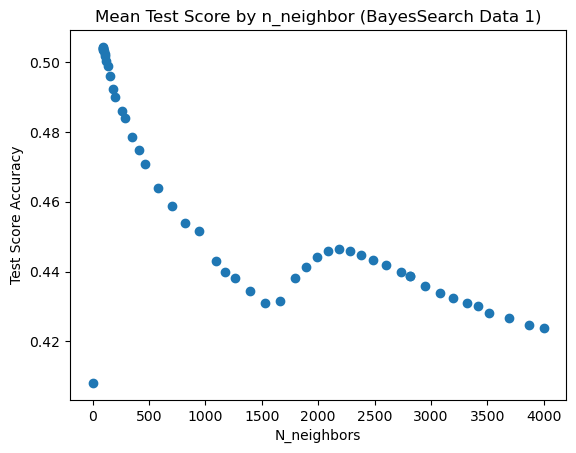

In [22]:
plt.scatter([x["n_neighbors"] for x in bayes_search1_4.cv_results_["params"]], bayes_search1_4.cv_results_['mean_test_score'])
plt.title("Mean Test Score by n_neighbor (BayesSearch Data 1)")
plt.xlabel("N_neighbors")
plt.ylabel("Test Score Accuracy")

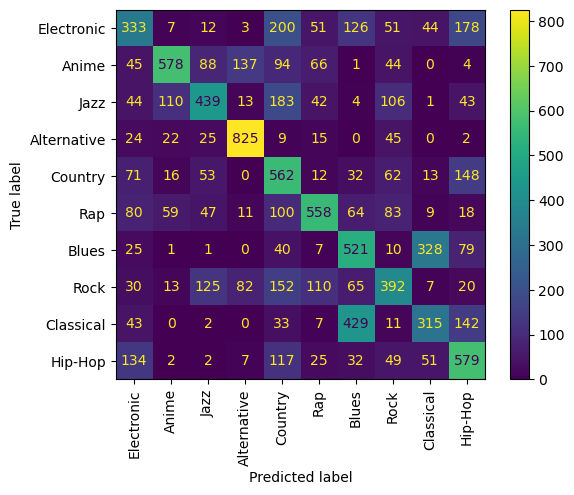

In [23]:
cm1 = confusion_matrix(y_test1_2, knn_test_pred1_4_2)
ax1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = data1["music_genre"].unique())
ax1.plot()
plt.xticks(rotation=90)
plt.show()

In [24]:
"""
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(X_train1, y_train1)
knn_test_pred1 = neigh.predict(X_test1)
test_acc1 = accuracy_score(y_test1, knn_test_pred1)
print("Accuracy (test):", test_acc1)
print("Accuracy (train):", accuracy_score(y_train1, neigh.predict(X_train1)))


cm1 = confusion_matrix(y_test1, knn_test_pred1)
ax1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = data1["music_genre"].unique())
ax1.plot()
plt.xticks(rotation=90)
plt.show()"""

'\nneigh = KNeighborsClassifier(n_neighbors=20)\nneigh.fit(X_train1, y_train1)\nknn_test_pred1 = neigh.predict(X_test1)\ntest_acc1 = accuracy_score(y_test1, knn_test_pred1)\nprint("Accuracy (test):", test_acc1)\nprint("Accuracy (train):", accuracy_score(y_train1, neigh.predict(X_train1)))\n\n\ncm1 = confusion_matrix(y_test1, knn_test_pred1)\nax1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels = data1["music_genre"].unique())\nax1.plot()\nplt.xticks(rotation=90)\nplt.show()'

In [28]:
print(classification_report(y_test1_2, knn_test_pred1_4_2))

              precision    recall  f1-score   support

 Alternative       0.40      0.33      0.36      1005
       Anime       0.72      0.55      0.62      1057
       Blues       0.55      0.45      0.49       985
   Classical       0.77      0.85      0.81       967
     Country       0.38      0.58      0.46       969
  Electronic       0.62      0.54      0.58      1029
     Hip-Hop       0.41      0.51      0.46      1012
        Jazz       0.46      0.39      0.42       996
         Rap       0.41      0.32      0.36       982
        Rock       0.48      0.58      0.52       998

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>